4.8.1


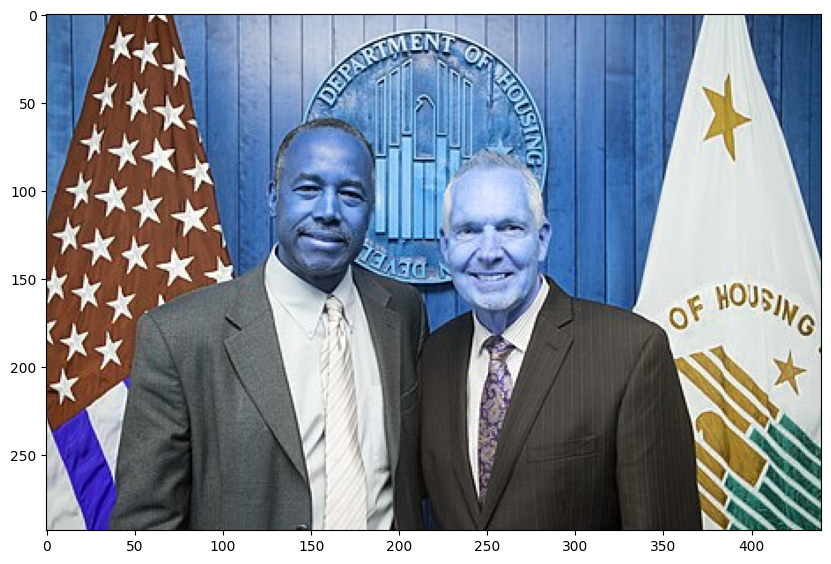

In [41]:
import cv2
print(cv2.__version__)
# used for accessing url to download files
import urllib.request as urlreq

# used to access local directory
import os
import ssl

# used to plot our images
import matplotlib.pyplot as plt

ssl._create_default_https_context = ssl._create_unverified_context

# used to change image size
from pylab import rcParams
# save picture's url in pics_url variable
pics_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/HUD_Secretary%2C_Ben_Carson.jpg/440px-HUD_Secretary%2C_Ben_Carson.jpg"

# save picture's name as pic
pic = "image.jpg"
urlreq.urlretrieve(pics_url, pic)

# read image with openCV
image = cv2.imread(pic)

# plot image with matplotlib package
plt.imshow(image)

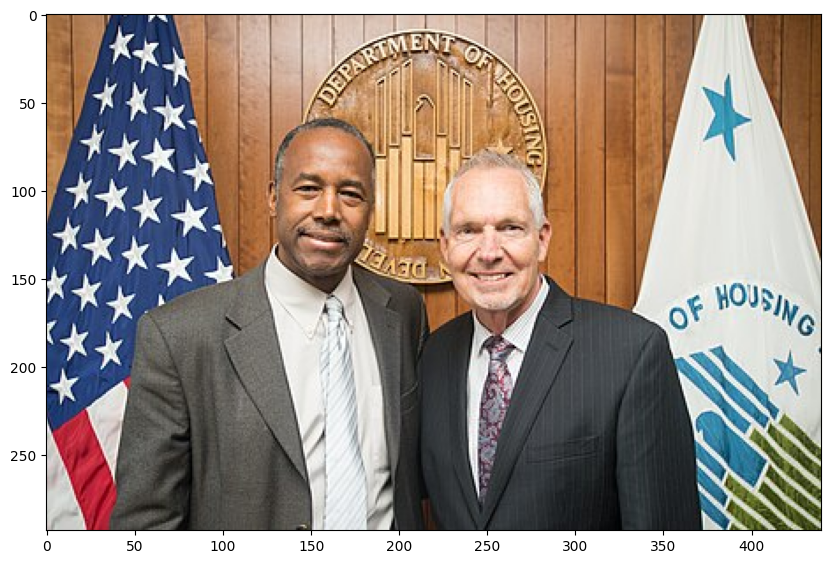

In [53]:
# convert image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot original image with matplotlib package
plt.imshow(image_rgb)  

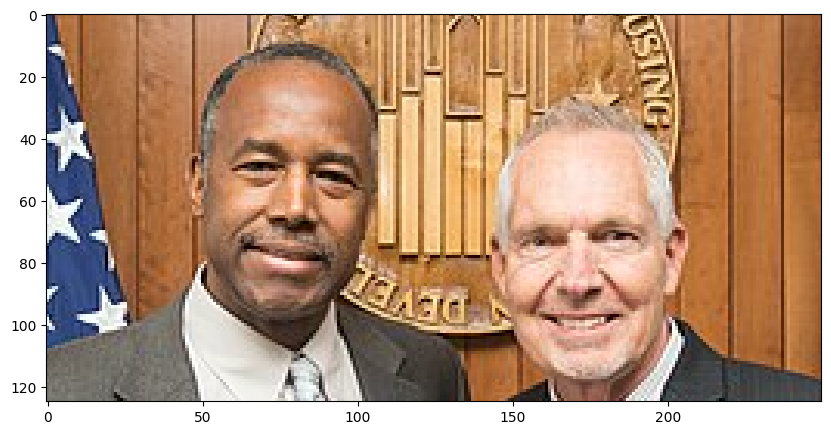

In [57]:
# set dimension for cropping image
x, y, width, depth = 80, 50, 250, 125
image_cropped = image_rgb[y:(y+depth), x:(x+width)]

# create a copy of the cropped image to be used later
image_template = image_cropped.copy()


# show cropped image
plt.imshow(image_cropped)  # 잘린 이미지를 플로팅

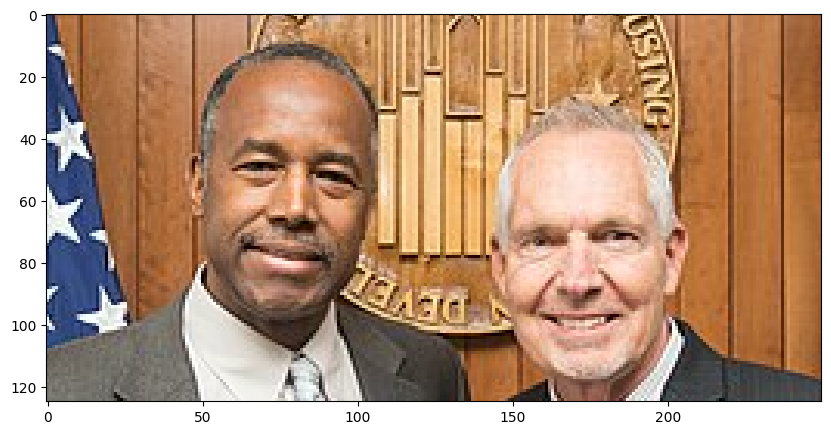

In [58]:
# Set zooming parameters
rcParams['figure.figsize'] = 10, 12
plt.imshow(image_cropped)

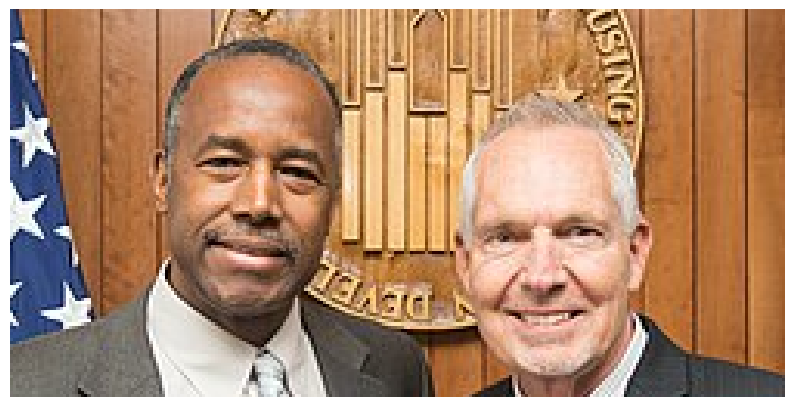

In [59]:
plt.axis("off")
plt.imshow(image_cropped)

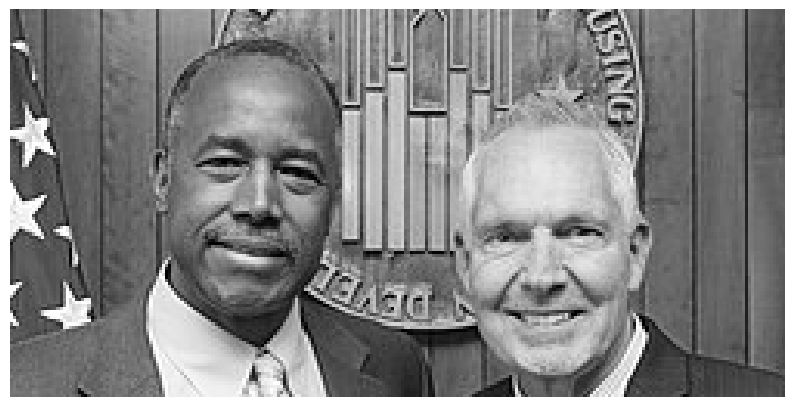

In [60]:
# convert image to Grayscale
image_gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

# remove axes
plt.axis("off")
plt.imshow(image_gray, cmap = "gray")

In [28]:
# face detection

File exists
Faces:
 [[140  47  65  65]
 [ 47  23  67  67]]


Text(0.5, 1.0, 'Face Detection')

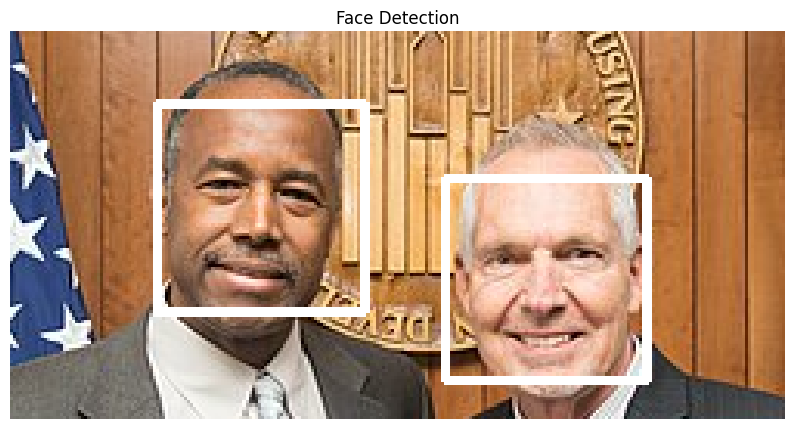

In [61]:
# save face detection algorithm's url in haarcascade_url variable
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml, < 1MB
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(image_gray)

# Print coordinates of detected faces
print("Faces:\n", faces)

for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2 
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(image_template)
plt.title('Face Detection')

File exists


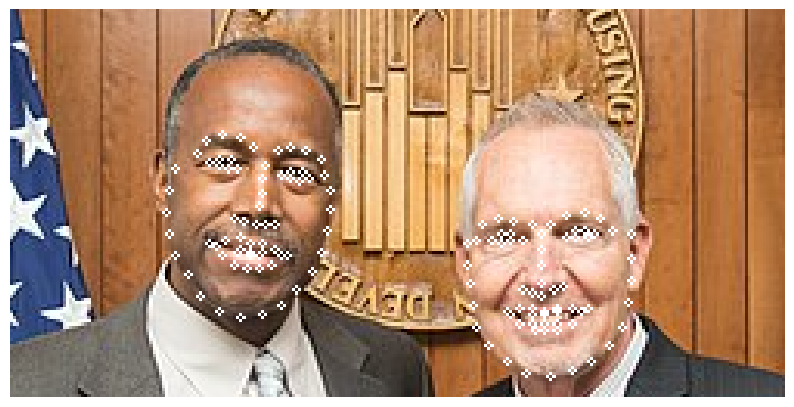

In [63]:
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "lbfmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml, < 54MB
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(image_gray, faces)

for landmark in landmarks:
    for x, y in landmark[0]:
        # display landmarks on "image_cropped"
        # with white colour in BGR and thickness 1
        cv2.circle(image_cropped, (int(x), int(y)), 1, (255, 255, 255), 1)

plt.axis("off")
plt.imshow(image_cropped)